In [ ]:
import cv2
import numpy as np
from scipy import ndimage
from scipy.ndimage.filters import convolve
from matplotlib import pyplot as plt
from PIL import Image

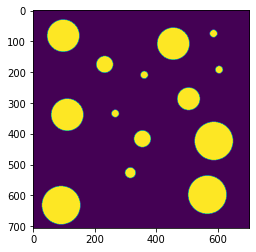

In [ ]:
img = Image.open("Resources/120x2O100x2O50x2O20x4.png").convert("L")
img_Gray = np.asarray(img, dtype=np.uint8)
imgGray = img_Gray.astype(np.uint8)
plt.imshow(imgGray)

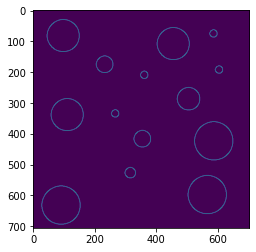

In [ ]:
edges = cv2.Canny(imgGray,100,200)
plt.imshow(edges)

In [ ]:
def detectCircles(edges, radius ,radiusrange=0):
    plt.imshow(edges, cmap='gray')
    plt.show()
    rows, columns = edges.shape
    for rad in range(radius, radius + radiusrange):
        img2buffer = np.zeros([rows, columns], dtype=np.uint8)
        for x in range(0, columns):
            for y in range(0, rows):
                if (edges[y, x] == 255):
                    for ang in range(0, 360):
                        t = (ang * np.pi) / 180
                        x0 = int(round(x + rad * np.cos(t)))
                        y0 = int(round(y + rad * np.sin(t)))
                        if (x0 < columns and x0 > 0 and y0 < rows and y0 > 0 and img2buffer[y0, x0] < 255):
                            img2buffer[y0, x0] += 1

        maxes = np.argwhere((img2buffer > 220) & (img2buffer < 255)).flatten()

        if (len(maxes) == 0):
            plt.imshow(img2buffer, cmap='gray')
            plt.show()
            print('no maxes')
            continue
        else:
            print(maxes)
            plt.imshow(img2buffer, cmap='gray')
            plt.show()
            for i in range(0, len(maxes), 2):
                cv2.circle(edges, center=(maxes[i + 1], maxes[i]), radius=rad, color=(255, 255, 255), thickness=2)

            plt.imshow(edges)
            plt.show()
            break

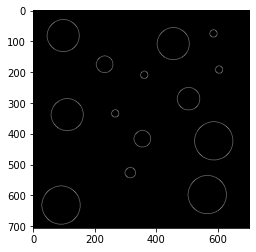

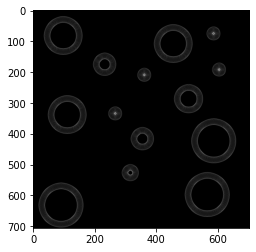

no maxes


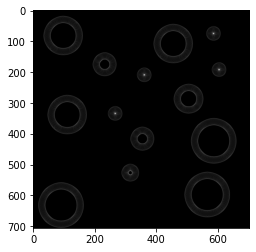

no maxes
[ 75 583 192 601 209 359 334 265]


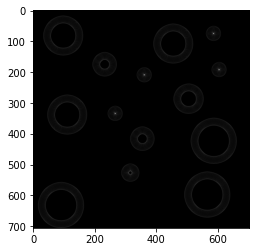

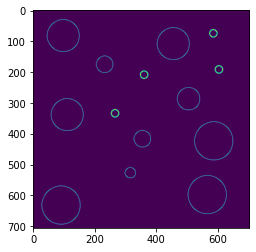

In [ ]:
detectCircles(edges, 10, 4)